In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\MOHD RAHEEM\Documents\Naresh IT\Data-Files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


#### (1) Bi-variate analysis:
- Analysing of two variables 
- That may be
    - Both in categorical columns
                (or)
    - Both in numerical columns
                (or)
    - One categorical and One numerical

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat_cols=visa_df.select_dtypes(include='object').columns
cat_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

#### (2) continent-case_status:

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

#### (1Q) How many people from asia got the visa Certified?
#### (2Q) How many people from asia got the visa Denied?

In [7]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1 & con2
len(visa_df[con])
print(f"The number of employees from Asia whose visa's are certified: {len(visa_df[con])}")

The number of employees from Asia whose visa's are certified: 11012


In [8]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Denied')
con=con1 & con2
len(visa_df[con])
print(f"The number of employees from Asia whose visa's are denied: {len(visa_df[con])}")

The number of employees from Asia whose visa's are denied: 5849


In [9]:
keys=visa_df['continent'].unique()
certi_list,deni_list=[],[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1 & con2 
    deni_con=con1 & con3
    certi_list.append(len(visa_df[certi_con]))
    deni_list.append(len(visa_df[deni_con]))

pd.DataFrame(zip(certi_list,deni_list),index=keys,columns=['Certified','Denied'])

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


#### .crosstab():
- First argument: index
- Second argument: column

In [10]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [11]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

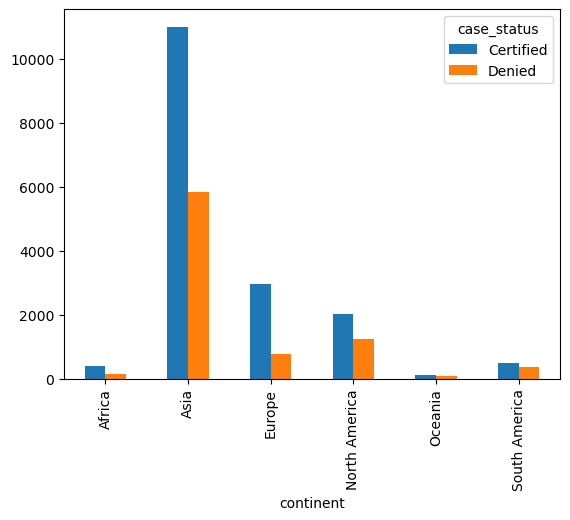

In [12]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

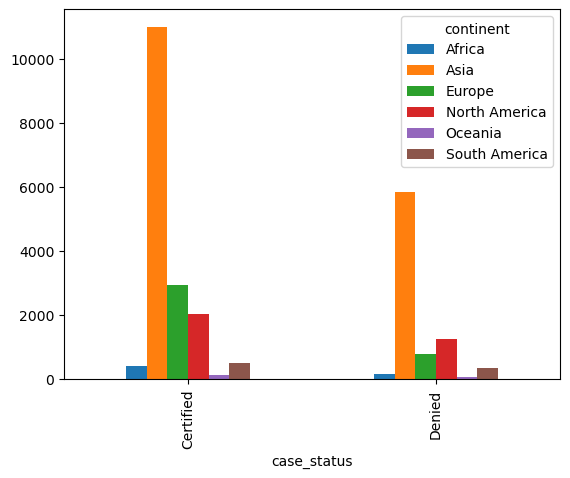

In [13]:
result2.plot(kind='bar')

In [14]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

#### (II)Numerical-Numerical:
- In order to plot numerical vs numerical we need to use scatter plots
- Scatter plots will give the relation between two numerical columns
- It is under matplotlib

$plt.scatter$

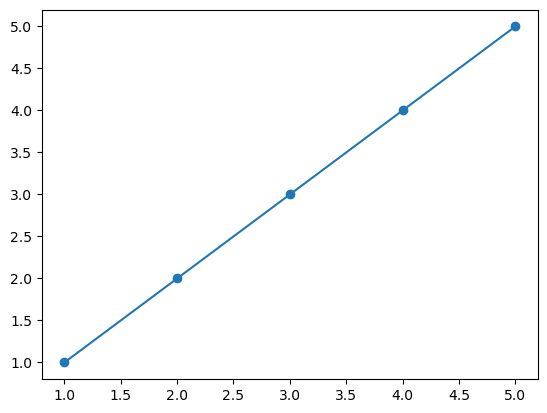

In [15]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# It is y=x plot 
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

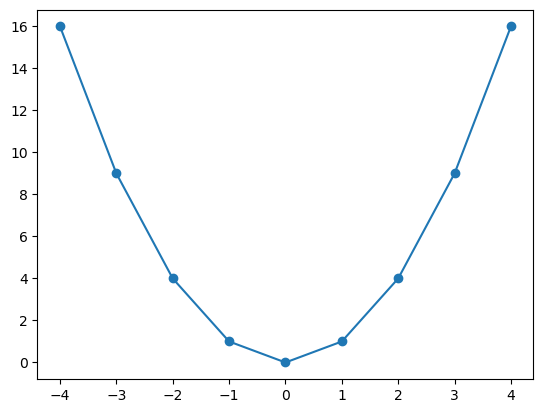

In [16]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
# It is y=x*x plot 
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [17]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

#### Scatter plot-1
- no_of_employees
- yr_of_estab

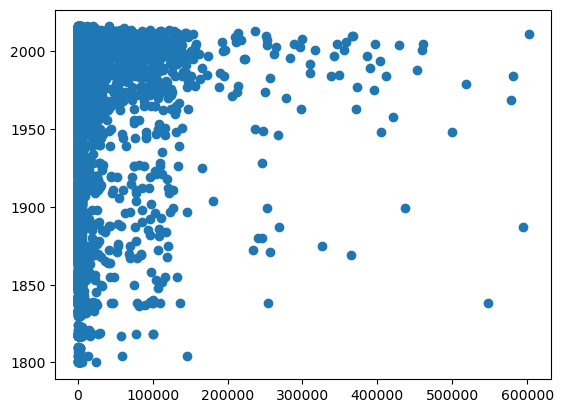

In [18]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

- Observation == No relation
- Pearson's correlation coefficient is equal to 0

#### Scatter plot-2
- yr_of_estab
- prevailing_wage

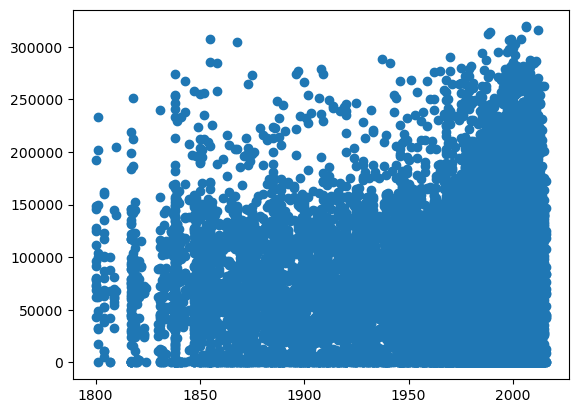

In [19]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

- Observation == No relation
- Pearson's correlation coefficient is equal to 0

#### Scatter plot-3
- prevailing_wage
- no_of_employees

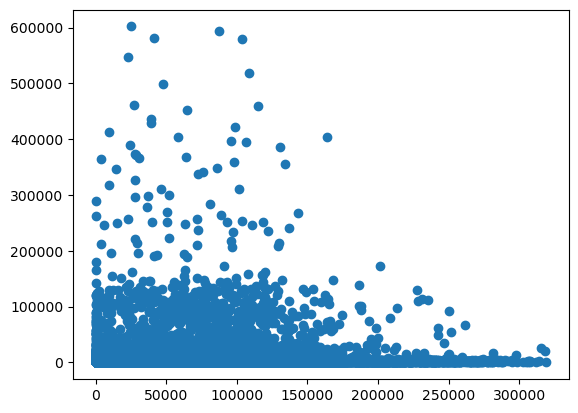

In [20]:
col1=visa_df['prevailing_wage']
col2=visa_df['no_of_employees']
plt.scatter(col1,col2)

- Observation == No relation
- Pearson's correlation coefficient is equal to 0

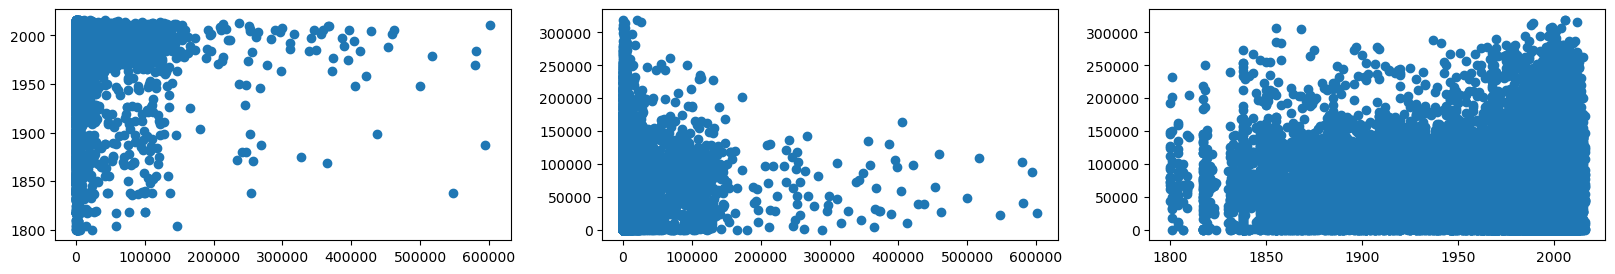

In [21]:
plt.figure(figsize=(20,3))

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)


col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)

<img alt="" style="width: 643.3px; height: 175.1px; margin-top: 2.5px; margin-left: 0px;" class="" src="https://tse2.mm.bing.net/th?id=OIP._PR2vnJXhIdDdPfPkQ8WpAHaCA&amp;pid=Api&amp;P=0&amp;h=180" id="yui_3_5_1_1_1717686707195_1115">

#### Correlation Coefficient:
- Pearson's correlation coefficient will give the amount of realtion between variables
- It is denoted with r
- r varies from -1 to 1
- For +ve relation r varies from 0 to 1
- For -ve relation r varies from -1 to 0
- For no relation r is approx 0
- In python code we have **corr** function under pandas
    - This will give covariance matrix 
    - We already discussed covariance matrix is rows & columns type
    - In this data we have 3 numerical columns
    - So we will get 3*3 == 9 values
    - All trace of the matrix represents variance
    - Upper triangle and lower triangle represents co variance

In [22]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


#### Observations:
- The correlation value between no_of_employees  and  yr_of_estb approximately zero
    - which indicates no relation

- The correlation value between no_of_employees  and  prevailing_wage zero
    - which indicates no relation

- The correlation value between yr_of_estb  and  prevailing_wage approximately zero
    - which indicates no relation

#### What happen if correlation is high
- For that we will read wine quality dataset
- Will perform the **corr**

In [5]:
wine_df=pd.read_csv(r"C:\Users\MOHD RAHEEM\Documents\Naresh IT\Data-Files\winequality_red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
wine_df=wine_df.drop_duplicates()
# If you see 1st row as NAN
wine_df.iloc

In [28]:
wine_df=wine_df.drop_duplicates()
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
wine_df.iloc[1:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
len(wine_df.columns)

12

In [33]:
# 12*12=144
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

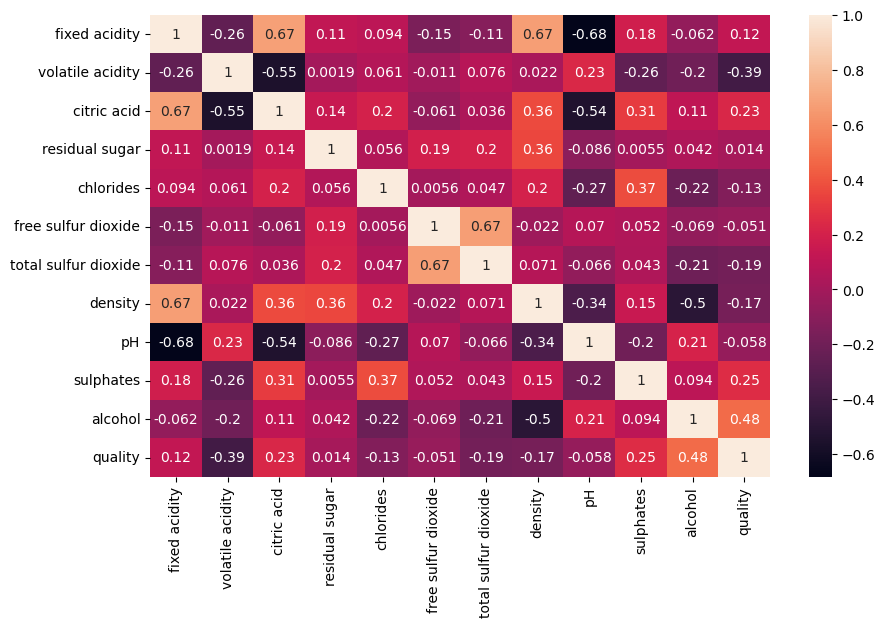

In [6]:
wine_corr=wine_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

# While running the above code, many students sees blur graph, because of seaborn package was outdated, 
# So we have upgraded the seaborn package,by running the following command in anaconda prompt
# pip install seaborn --upgrade
# After this click(kernel) & click(restart)

In [9]:
sns.__version__

'0.13.2'

In [ ]:
# Draw the scatter plots for wine data columns 
# Which is having highest positive correlation
# Which is having highest negative correlation

<Axes: >

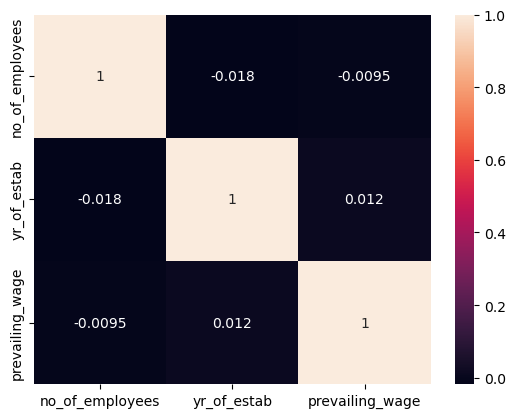

In [13]:
visa_df=pd.read_csv(r"C:\Users\MOHD RAHEEM\Documents\Naresh IT\Data-Files\Visadataset.csv")
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

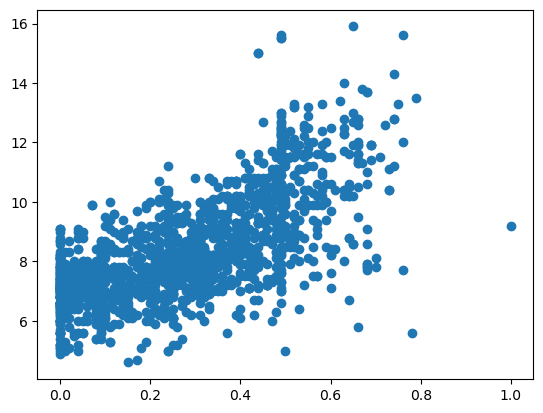

In [12]:
col1=wine_df['citric acid']
col2=wine_df['fixed acidity']
plt.scatter(col1,col2)

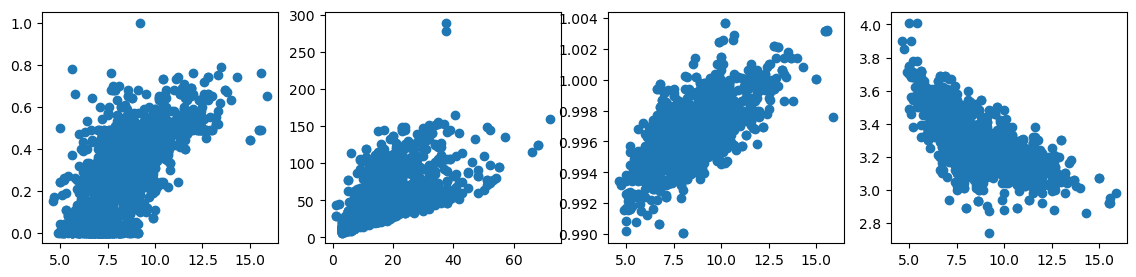

In [18]:
plt.figure(figsize=(14,3))
col1=wine_df['fixed acidity']
col2=wine_df['citric acid']
plt.subplot(1,4,1)
plt.scatter(col1,col2)

col1=wine_df['free sulfur dioxide']
col2=wine_df['total sulfur dioxide']
plt.subplot(1,4,2)
plt.scatter(col1,col2)

col1=wine_df['fixed acidity']
col2=wine_df['density']
plt.subplot(1,4,3)
plt.scatter(col1,col2)

col1=wine_df['fixed acidity']
col2=wine_df['pH']
plt.subplot(1,4,4)
plt.scatter(col1,col2)